In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score


In [9]:
data=pd.read_csv("iiris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
x=data.drop(['species'],axis=1)
y=data.drop(['sepal_length','sepal_width','petal_length','petal_width'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [14]:
model=GaussianNB()

In [15]:
model.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [16]:
y_pred=model.predict(x_test)

In [17]:
model.score(x_test,y_test)

0.9333333333333333

In [18]:
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [19]:
cm=confusion_matrix(y_test,y_pred)

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
print("confusion Matrix")
print(cm)

confusion Matrix
[[ 7  0  0]
 [ 0 12  1]
 [ 0  1  9]]


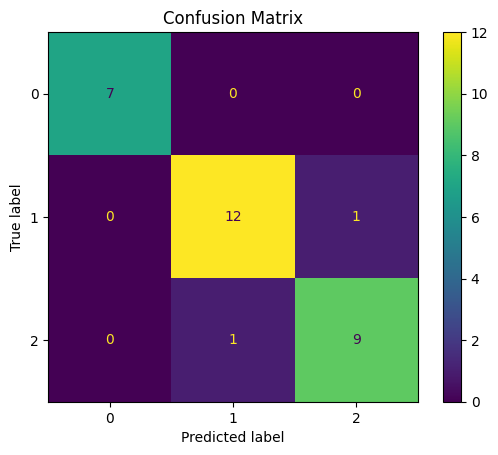

In [21]:
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [23]:
def get_confusion_matrix_values(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    return (cm[0][0],cm[0][1],cm[1][0],cm[1][1])

In [24]:
TP, FP, FN, TN= get_confusion_matrix_values(y_test,y_pred)

In [25]:
print("TP",TP)
print("FP",FP)
print("FN",FN)
print("TN",TN)

print("accuracy rate",(TP+TN)/(TP+FP+FN+TN))
print("error rate",(1-(TP+TN)/(TP+FP+FN+TN)))
print("precision ",TP/(TP+FP))
print("recall rate ",(TP)/(TP+FN))

TP 7
FP 0
FN 0
TN 12
accuracy rate 1.0
error rate 0.0
precision  1.0
recall rate  1.0
